In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns


---
# Collecting data
Our data is about Rolex watches which are sold on `chrono24.com`.

Yes, He allows us to freely use the dataset.

He collected this data by scraping with Selenium

---
# Exploring data

In [2]:
rolex_df = pd.read_csv('rolex_scaper_clean.csv')

#### Number of rows and columns

In [3]:
num_rows,num_cols = rolex_df.shape
rolex_df.shape

(87117, 12)

#### Meaning of each row
We can see that each row has information like model, price, ... about the watch.

In [4]:
rolex_df.head()

,model,reference number,price,aditional shipping price,ad name,movement,case material,case diameter,year of production,condition,scope of delivery,location
0,Rolex Lady-Datejust,179161,9080.0,140.0,Steel Rose Gold Black Roman Dial Ladies Watch ...,Automatic,Steel,26 mm,2014.0,Very good,"Original box, original papers","United States of America, Georgia"
1,Rolex Chronograph,2917,16202.0,216.0,REF. 2917,Manual winding,Steel,33 mm,1934.0,Very good,"Original box, no original papers","Italy, Roma"
2,Rolex Daytona,116519G,41567.0,0.0,保証書付き ROLEX ロレックス デイトナ コスモグラフ K18WG 8Pダイヤ ランダム...,Automatic,White gold,39 mm,NaN,Fair,"Original papers, no original box","Japan, Nagoya City"
3,Rolex Submariner Date,116613,19795.0,235.0,New Submariner 116613 Yellow Steel Gold Cerami...,Automatic,Steel,40 mm,2020.0,Unworn,"Original box, original papers","United States of America, Florida, Miami"
4,Rolex Submariner Date,16610,10674.0,145.0,1990s ROLEX SUBMARINER 16610 Tritium vintage G...,Automatic,NaN,40 mm,1990.0,Good,"Original box, original papers","Japan, Ehime yawatahama"


#### Are there duplicated rows ?

In [5]:
rolex_df.duplicated(keep='first').sum()

21898

Drop duplicated rows

In [6]:
rolex_df.drop_duplicates(inplace=True)

#### Meaning of each columns ?

model: the watch model name

reference number: the number to identify the watch model as a whole

price: the price on the listing (price made by the reseller)

additional shipping price: the price for shipping (0 = free shipping)

ad name: the name of the listing on the site

movement: the engine of a watch to make the watch and its functions operate

case material: the material of the external watch case

case diameter: the dimensions of the watch

year of production: the year when Rolex fabricate that particular watch

condition: the general condition of the watch

scope of delivery: the additional things like warranty, or box that could come with the watch

location: the location of the reseller


#### Type of each colum 
Luckily, all columns are in their right data types except for year of production. It should be categorical (object) instead of float64.

In [7]:
rolex_df.dtypes 

model                        object
reference number             object
price                       float64
aditional shipping price    float64
ad name                      object
movement                     object
case material                object
case diameter                object
year of production          float64
condition                    object
scope of delivery            object
location                     object
dtype: object

Change data types of year of production column

In [8]:
rolex_df['year of production'] = rolex_df['year of production'].astype('object')
rolex_df.dtypes

model                        object
reference number             object
price                       float64
aditional shipping price    float64
ad name                      object
movement                     object
case material                object
case diameter                object
year of production           object
condition                    object
scope of delivery            object
location                     object
dtype: object

#### With each numerical column, how are values distributed?

In [9]:
numerical_cols = rolex_df.select_dtypes(include=np.number).copy()
numerical_cols.head()

,price,aditional shipping price
0,9080.0,140.0
1,16202.0,216.0
2,41567.0,0.0
3,19795.0,235.0
4,10674.0,145.0


Proportion of missing values

In [10]:
num_missing_percentages = (numerical_cols.isna()).sum() / rolex_df.shape[0] * 100
num_missing_percentages

price                       6.271179
aditional shipping price    0.000000
dtype: float64

Describe numerical/categorical columns

In [11]:
def describe__(df):
    res_df = pd.DataFrame(columns=[df.columns])

    try:
        res_df.loc['missing_ratio'] = np.asarray(missing_percentages[df.columns])
    except:
        res_df.loc['missing_ratio'] = np.asarray((df.isna()).sum() / df.shape[0] * 100)
        
    res_df.loc['num_unique'] = np.asarray(df.nunique())
    res_df.loc['unique'] = np.asarray([df[col].unique() for col in df], dtype=object)

    return res_df

Describe

In [12]:
numerical_cols.describe()

,price,aditional shipping price
count,6.112900e+04,65219.000000
mean,2.276485e+04,134.830234
std,3.059692e+04,2580.042710
min,3.150000e+02,0.000000
25%,9.157000e+03,31.000000
50%,1.500000e+04,99.000000
75%,2.483300e+04,160.000000
max,1.152102e+06,656389.000000


In [13]:
describe__(numerical_cols)

,price,aditional shipping price
missing_ratio,6.271179,0.0
num_unique,15492.0,299.0
unique,"[9080.0, 16202.0, 41567.0, 19795.0, 10674.0, 2...","[140.0, 216.0, 0.0, 235.0, 145.0, 75.0, 189.0,..."


#### With each categorical column, how are values distributed?

In [14]:
categorical_cols = rolex_df.select_dtypes(exclude=np.number).copy()
categorical_cols.head()

,model,reference number,ad name,movement,case material,case diameter,year of production,condition,scope of delivery,location
0,Rolex Lady-Datejust,179161,Steel Rose Gold Black Roman Dial Ladies Watch ...,Automatic,Steel,26 mm,2014.0,Very good,"Original box, original papers","United States of America, Georgia"
1,Rolex Chronograph,2917,REF. 2917,Manual winding,Steel,33 mm,1934.0,Very good,"Original box, no original papers","Italy, Roma"
2,Rolex Daytona,116519G,保証書付き ROLEX ロレックス デイトナ コスモグラフ K18WG 8Pダイヤ ランダム...,Automatic,White gold,39 mm,NaN,Fair,"Original papers, no original box","Japan, Nagoya City"
3,Rolex Submariner Date,116613,New Submariner 116613 Yellow Steel Gold Cerami...,Automatic,Steel,40 mm,2020.0,Unworn,"Original box, original papers","United States of America, Florida, Miami"
4,Rolex Submariner Date,16610,1990s ROLEX SUBMARINER 16610 Tritium vintage G...,Automatic,NaN,40 mm,1990.0,Good,"Original box, original papers","Japan, Ehime yawatahama"


In [15]:
categorical_cols.describe()

,model,reference number,ad name,movement,case material,case diameter,year of production,condition,scope of delivery,location
count,65219,63127,65161,62855,61721,62312,48335.0,64301,65219,65219
unique,58,4863,44292,3,13,643,111.0,7,4,4097
top,Rolex Datejust 36,126334,126334,Automatic,Steel,40 mm,2022.0,Very good,"Original box, original papers","United States of America, New York, New York"
freq,8026,1551,333,60696,35519,21627,12016.0,33768,41707,5303


In [16]:
describe__(categorical_cols)

,model,reference number,ad name,movement,case material,case diameter,year of production,condition,scope of delivery,location
missing_ratio,0.0,3.207654,0.088931,3.624711,5.363468,4.45729,25.888161,1.407565,0.0,0.0
num_unique,58.0,4863.0,44292.0,3.0,13.0,643.0,111.0,7.0,4.0,4097.0
unique,"[Rolex Lady-Datejust, Rolex Chronograph, Rolex...","[179161, 2917, 116519G, 116613, 16610, 126331,...",[Steel Rose Gold Black Roman Dial Ladies Watch...,"[Automatic, Manual winding, nan, Quartz]","[Steel, White gold, nan, Gold/Steel, Yellow go...","[26 mm, 33 mm, 39 mm, 40 mm, 41 mm, 36 mm, 31 ...","[2014.0, 1934.0, nan, 2020.0, 1990.0, 2022.0, ...","[Very good, Fair, Unworn, Good, New, nan, Poor...","[Original box, original papers, Original box, ...","[United States of America, Georgia, Italy, Rom..."


Percentage of missing values

In [17]:
cate_missing_percentages = (categorical_cols.isna()).sum() / rolex_df.shape[0] * 100
cate_missing_percentages

model                  0.000000
reference number       3.207654
ad name                0.088931
movement               3.624711
case material          5.363468
case diameter          4.457290
year of production    25.888161
condition              1.407565
scope of delivery      0.000000
location               0.000000
dtype: float64

Number of different values

In [18]:
categorical_cols.nunique()

model                    58
reference number       4863
ad name               44292
movement                  3
case material            13
case diameter           643
year of production      111
condition                 7
scope of delivery         4
location               4097
dtype: int64

---

# Asking meaningful questions 

In [19]:
rolex_df.drop(columns = ['ad name'],inplace=True)
rolex_df = rolex_df[rolex_df['model'] != 'Rolex']

In [20]:
rolex_df.reset_index(drop=True,inplace = True)
rolex_df.head()

,model,reference number,price,aditional shipping price,movement,case material,case diameter,year of production,condition,scope of delivery,location
0,Rolex Lady-Datejust,179161,9080.0,140.0,Automatic,Steel,26 mm,2014.0,Very good,"Original box, original papers","United States of America, Georgia"
1,Rolex Chronograph,2917,16202.0,216.0,Manual winding,Steel,33 mm,1934.0,Very good,"Original box, no original papers","Italy, Roma"
2,Rolex Daytona,116519G,41567.0,0.0,Automatic,White gold,39 mm,NaN,Fair,"Original papers, no original box","Japan, Nagoya City"
3,Rolex Submariner Date,116613,19795.0,235.0,Automatic,Steel,40 mm,2020.0,Unworn,"Original box, original papers","United States of America, Florida, Miami"
4,Rolex Submariner Date,16610,10674.0,145.0,Automatic,NaN,40 mm,1990.0,Good,"Original box, original papers","Japan, Ehime yawatahama"


Check if dataset still consists missing values

In [21]:
missing_percentages = rolex_df.isna().sum()/rolex_df.shape[0]*100
missing_percentages

model                        0.000000
reference number             2.672060
price                        6.321740
aditional shipping price     0.000000
movement                     3.574719
case material                5.241048
case diameter                4.289975
year of production          25.630534
condition                    1.361798
scope of delivery            0.000000
location                     0.000000
dtype: float64

In [22]:
# remove ad name from categorical columns
new_cat_cols = pd.DataFrame(categorical_cols.drop(columns = ['ad name'],inplace=False))
new_cat_cols.head(3)

,model,reference number,movement,case material,case diameter,year of production,condition,scope of delivery,location
0,Rolex Lady-Datejust,179161,Automatic,Steel,26 mm,2014.0,Very good,"Original box, original papers","United States of America, Georgia"
1,Rolex Chronograph,2917,Manual winding,Steel,33 mm,1934.0,Very good,"Original box, no original papers","Italy, Roma"
2,Rolex Daytona,116519G,Automatic,White gold,39 mm,NaN,Fair,"Original papers, no original box","Japan, Nagoya City"


Take a look at categorical/numerical columns missing ratio and unique values 

numerical columns

In [23]:
describe__(numerical_cols)

,price,aditional shipping price
missing_ratio,6.32174,0.0
num_unique,15492.0,299.0
unique,"[9080.0, 16202.0, 41567.0, 19795.0, 10674.0, 2...","[140.0, 216.0, 0.0, 235.0, 145.0, 75.0, 189.0,..."


new categorical columns (remove ad name)

In [24]:
describe__(new_cat_cols)

,model,reference number,movement,case material,case diameter,year of production,condition,scope of delivery,location
missing_ratio,0.0,2.67206,3.574719,5.241048,4.289975,25.630534,1.361798,0.0,0.0
num_unique,58.0,4863.0,3.0,13.0,643.0,111.0,7.0,4.0,4097.0
unique,"[Rolex Lady-Datejust, Rolex Chronograph, Rolex...","[179161, 2917, 116519G, 116613, 16610, 126331,...","[Automatic, Manual winding, nan, Quartz]","[Steel, White gold, nan, Gold/Steel, Yellow go...","[26 mm, 33 mm, 39 mm, 40 mm, 41 mm, 36 mm, 31 ...","[2014.0, 1934.0, nan, 2020.0, 1990.0, 2022.0, ...","[Very good, Fair, Unworn, Good, New, nan, Poor...","[Original box, original papers, Original box, ...","[United States of America, Georgia, Italy, Rom..."


### Question 1 : How can we know if we had bought a great deal (Our team will create a model to predict price of watch) 
Have you ever wanted to buy a watch but you do not know that the price of the thing that you found is cheap or expensive. That is the reason why we want to ask this question is that our team was in this situations multiple times. We find that it is really time consuming when you have to find the things which we want to buy at a good price. Therefore, we will create a model that can help us and other people who want to buy Rolex save time from searching for a great deal. And if we can solve this problem, we can use this model to predict price of various things not only Rolex watches.

Class to preprocess data

In [165]:
class preprocess(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y=None):
        return self
        
    def transform (self, X_df):
        out_df = X_df.copy()
    
        #Remove watch's size in model name
        out_df['model'].replace(regex = True,to_replace = r"[0-9]",value = '',inplace= True)

        # #Get true size of case
        out_df['case diameter'] = out_df['case diameter'].str.extract(r'(^[\d][\d])')

        #Preprocess ref number because some ref num are in wrong format (including characters,etc) 

        tmp = out_df['reference number'].str.extract(r'(\d+[-]\d+)|(\d+)')
        tmp[0].fillna(tmp[1],inplace=True)
        out_df['reference number'] = tmp[0]

        #Replace all Nan with Unknown
        out_df['reference number'].replace(regex = True,to_replace = "",value = 'Unknown',inplace= True)

        out_df['year of production'] = out_df['year of production'].astype(np.number)
        out_df.loc[out_df['year of production'] < 1905, 'year of production' ] = np.nan
        out_df['year of production'] = out_df['year of production'].astype('object')

        model_list = out_df['model'].unique()
        for i in model_list:
            try:
                out_df[out_df['model'] == i]['price'].fillna(value = out_df[out_df['model'] == i]['price'].mean())
            except:
                pass
            try :
                out_df[out_df['model'] == i] = out_df[out_df['model'] == i].fillna(out_df[out_df['model'] == i].mode().iloc[0])
            except:
                pass
        return out_df

Split data

In [120]:
tmp  = rolex_df[['model', 'reference number', 'price',
       'movement', 'case material', 'case diameter', 'year of production',
       'condition', 'scope of delivery']].copy()

X_train, X_test= train_test_split(tmp, test_size=0.2, random_state=0)
X_train = preprocess().transform(X_train)
Y_train = X_train['price']
X_train.drop("price", axis=1,inplace=True)

X_test = preprocess().transform(X_test)
Y_test = X_test['price']
X_test.drop("price", axis=1,inplace=True)

Create pipleline 

In [173]:
categorical_cols = X_train.select_dtypes(exclude=np.number).columns
numerical_cols = X_train.select_dtypes(include = np.number).columns

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
scaler = StandardScaler()

numerics_pipeline = make_pipeline(scaler)
categorical_pipeline = make_pipeline(ohe,scaler)

col_transformer = make_column_transformer(
    (numerics_pipeline,numerical_cols),
    (categorical_pipeline,categorical_cols),
    remainder='passthrough')
preprocess_pipeline = make_pipeline(preprocess(), col_transformer)


Predict

In [123]:
full_pipeline = make_pipeline(preprocess_pipeline,RandomForestRegressor(n_jobs = -1,verbose = True))
clf = full_pipeline.fit(X_train,Y_train)
predict_y = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy

RMSE

In [124]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
sqrt(mean_squared_error(predict_y, Y_test))

17937.516284287634

R^2 score

In [125]:
r2_score(Y_test,predict_y)


0.6503166163593237

Test accuracy

In [126]:
clf.score(X_test,Y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


0.6503166163593237

Train accuracy

In [127]:
clf.score(X_train,Y_train)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


0.8683035147997937

Test model

Price of this watch is 12825$

In [205]:
Rolex_test = pd.read_csv('test_model.csv')


In [206]:
df3 = pd.concat([Rolex_test, X_test], ignore_index = True)

In [207]:
clf.predict(df3)[0]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


13352.536412916244

#### Conclusion

- The accuracy on test set is about **65% and on the training set is approximately 87%**. The model still gives an acceptable prediction on the price of the test watch,although the accuracy of our model on test set is not really high. The true price is 12825$ and the predicted price is about 13352$, i think we can count on this model for the next time when we want to but a new Rolex. 
- We also tried to stack various models in order to increase the accuracy, but it only enhanced about 2-3% and took too long to run (about 2-3 hours running on Google Colab). That is the reason why on this report we only use the RandomForestRegressor.


## Question 2
- How Rolex manufacture their watches over the years (movement, case material) ?
- By answering this question, we will know a bit more about how Rolex manufacture their watches to satisfy the needs or their customers over the years

### Double check if there are any abnormal values

- Get a copy of original data

In [104]:
tt=rolex_df.copy()

- Extract features that is needed for answering this question and store to a new dataframe `q2df`

In [105]:
tt=preprocess().transform(tt)
q2df=tt[['model', 'movement', 'case material', 'case diameter', 'year of production']]
q2df.sort_values(by=['year of production'], ascending=False)

,model,movement,case material,case diameter,year of production
25029,Rolex Datejust,Automatic,Steel,31,20052004.0
2865,Rolex GMT-Master II,Automatic,Steel,40,2023.0
9570,Rolex Milgauss,Automatic,Steel,40,2023.0
32016,Rolex Oyster Perpetual,Automatic,Steel,36,2022.0
24120,Rolex GMT-Master II,Automatic,Rose gold,40,2022.0
...,...,...,...,...,...
31323,Rolex Precision,Manual winding,Steel,18,1922.0
17954,Rolex Prince,Manual winding,Silver,23,1920.0
44918,Rolex Prince,Manual winding,White gold,12,1920.0
30293,Rolex Prince,Manual winding,Yellow gold,10,1920.0


- By observing we can see there are some abnormal values in `year of product` column like `20052004` and `2023`
- We will drop these rows

In [106]:
q2df=q2df[q2df['year of production'] <= 2022]
q2df.sort_values(by=['year of production'], ascending=False)

,model,movement,case material,case diameter,year of production
32018,Rolex Submariner Date,Automatic,Steel,41,2022.0
49965,Rolex Oyster Perpetual,Automatic,Steel,41,2022.0
49949,Rolex Sea-Dweller,Automatic,Gold/Steel,43,2022.0
24134,Rolex Datejust,Automatic,Gold/Steel,41,2022.0
24132,Rolex Day-Date,Automatic,Yellow gold,40,2022.0
...,...,...,...,...,...
31323,Rolex Precision,Manual winding,Steel,18,1922.0
17954,Rolex Prince,Manual winding,Silver,23,1920.0
44918,Rolex Prince,Manual winding,White gold,12,1920.0
30293,Rolex Prince,Manual winding,Yellow gold,10,1920.0


- All good, now the data is ready 

### a. How Rolex `movement` changes ?

- Count how many time each movement appears in the data

In [136]:
mmgb=q2df.groupby(['year of production', 'movement']).count()
mmgb

model  case material  case diameter
year of production movement                                           
1920.0             Manual winding      4              4              4
1922.0             Manual winding      1              1              1
1925.0             Manual winding      1              1              1
1928.0             Manual winding      2              2              2
1930.0             Automatic           1              1              1
...                                  ...            ...            ...
2021.0             Automatic        5182           5182           5182
                   Manual winding      7              7              7
                   Quartz              1              1              1
2022.0             Automatic       26484          26484          26484
                   Manual winding     35             35             35

[220 rows x 3 columns]

- Reset index and extract and rename the columns that we need

In [137]:
# reset index
mmgb = mmgb.reset_index()
mmgb = mmgb[['year of production', 'movement', 'model']]
mmgb = mmgb.rename(columns={'model': 'count'})

- Pivot the data to get the number of each movement in each year

In [138]:
res_mm = mmgb.pivot(index='year of production', columns='movement', values='count')
res_mm = res_mm.fillna(0)
res_mm

movement,Automatic,Manual winding,Quartz
year of production,,,
1920.0,0.0,4.0,0.0
1922.0,0.0,1.0,0.0
1925.0,0.0,1.0,0.0
1928.0,0.0,2.0,0.0
1930.0,1.0,35.0,0.0
...,...,...,...
2018.0,1317.0,3.0,0.0
2019.0,1738.0,2.0,0.0
2020.0,2371.0,3.0,0.0


- Get the most common movement in each year

In [139]:
res_mmdf = pd.DataFrame(res_mm.idxmax(axis=1), columns=['movement']).reset_index()
res_mmdf

,year of production,movement
0,1920.0,Manual winding
1,1922.0,Manual winding
2,1925.0,Manual winding
3,1928.0,Manual winding
4,1930.0,Manual winding
...,...,...
89,2018.0,Automatic
90,2019.0,Automatic
91,2020.0,Automatic
92,2021.0,Automatic


- Create a list to store all the movements available

In [140]:
mm_list = tt['movement'].unique()
mm_list

array(['Automatic', 'Manual winding', 'Quartz'], dtype=object)

Select all years that have Automatic as the most common movement

In [141]:
# Automatic
res_mmdf.loc[res_mmdf['movement'] == mm_list[0]]

,year of production,movement
7,1936.0,Automatic
16,1945.0,Automatic
19,1948.0,Automatic
20,1949.0,Automatic
22,1951.0,Automatic
...,...,...
89,2018.0,Automatic
90,2019.0,Automatic
91,2020.0,Automatic
92,2021.0,Automatic


Manual winding

In [142]:
# Manual winding
res_mmdf.loc[res_mmdf['movement'] == mm_list[1]]

,year of production,movement
0,1920.0,Manual winding
1,1922.0,Manual winding
2,1925.0,Manual winding
3,1928.0,Manual winding
4,1930.0,Manual winding
5,1934.0,Manual winding
6,1935.0,Manual winding
8,1937.0,Manual winding
9,1938.0,Manual winding
10,1939.0,Manual winding


It looks like Quartz has never been common in Rolex watches

In [143]:
# Quartz
res_mmdf.loc[res_mmdf['movement'] == mm_list[2]].shape[0]

0

##### Prepare the dataframe for visualization
- We going to replace the movements with number to make it easier to visualize

In [144]:
res_mmdf_plot = res_mmdf.copy()
res_mmdf_plot['movement'] = res_mmdf_plot['movement'].replace(mm_list[0], 0)
res_mmdf_plot['movement'] = res_mmdf_plot['movement'].replace(mm_list[1], 1)
# res_mmdf_plot['movement'] = res_mmdf_plot['movement'].replace(mm_list[2], 2)

res_mmdf_plot1 = res_mmdf_plot[res_mmdf_plot['movement'] == 0]
res_mmdf_plot2 = res_mmdf_plot[res_mmdf_plot['movement'] == 1]

##### Visualize the data

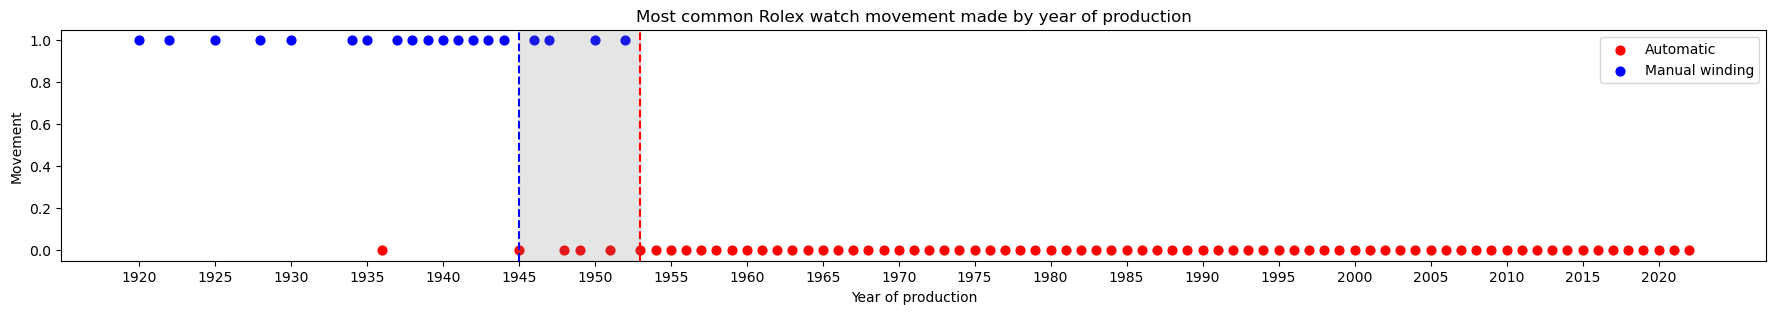

In [198]:
ax = plt.subplots(figsize=(22, 3))
scp1 = plt.scatter(res_mmdf_plot1['year of production'], res_mmdf_plot1['movement'], s=40, c='red', label='Automatic')
scp2 = plt.scatter(res_mmdf_plot2['year of production'], res_mmdf_plot2['movement'], s=40, c='blue', label='Manual winding')

plt.legend(handles=[scp1, scp2])
plt.title('Most common Rolex watch movement made by year of production')
plt.xlabel('Year of production')
plt.ylabel('Movement')

# two vertical lines to make it easier to see 
plt.axvline(x=1945, color='b', linestyle='--')
plt.axvline(x=1953, color='r', linestyle='--')
plt.axvspan(1945, 1953, alpha=0.2, color='grey')

plt.xticks(np.arange(1920, 2022, 5))

plt.show()

- We decide to use scatter plot to visualize the data as each every dot represents a movement (0 is Automatic, 1 is Manual winding, 2 is supposed to be Quatz but according to the data, it has never been common in Rolex watches)
- We will draw two lines to show the change of trend in Rolex watches movement (1945 - 1953) - the period of time show that the customers and Rolex were starting to change from Manual to Automatic.
  
  - The blue line is when trend starts to change from Manual to Automatic
  - The red line is when Automatic becomes the most common movement

So how the movement change in 1945 - 1953 ?
 - We will visualize that interval in details for better understanding

Prepare the data from 1940 to 1960 to visualize

In [210]:
ptc = mmgb.copy()
ptca = ptc[(ptc['year of production'] <= 1960) & (ptc['year of production'] >= 1940) & (ptc['movement'] == 'Automatic')]
ptcm = ptc[(ptc['year of production'] <= 1960) & (ptc['year of production'] >= 1940) & (ptc['movement'] == 'Manual winding')]
ptcq = ptc[(ptc['year of production'] <= 1960) & (ptc['year of production'] >= 1940) & (ptc['movement'] == 'Quartz')]

Visualize the data

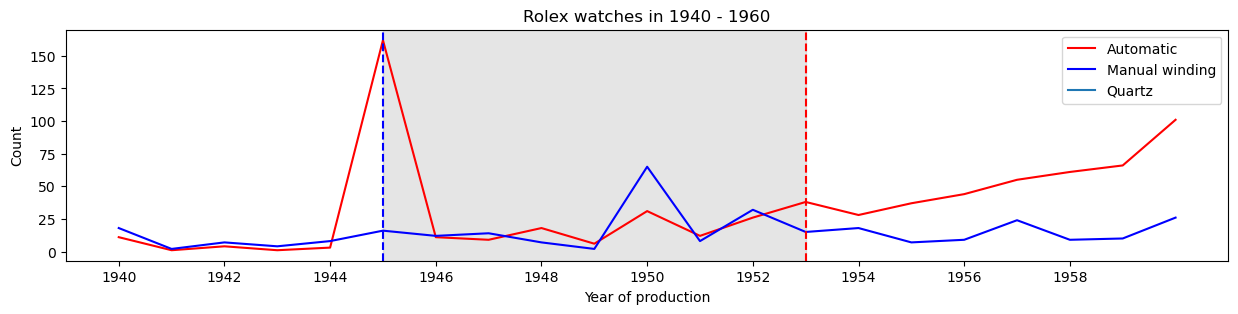

In [211]:
ax = ptca.plot(x='year of production', y='count', label='Automatic', figsize=(15, 3), color='red')
ptcm.plot(x='year of production', y='count', label='Manual winding', color='blue', ax=ax)
ptcq.plot(x='year of production', y='count', label='Quartz', ax=ax)
plt.title('Rolex watches in 1940 - 1960')
plt.xlabel('Year of production')
plt.ylabel('Count')

plt.axvline(x=1945, color='b', linestyle='--')
plt.axvline(x=1953, color='r', linestyle='--')
plt.axvspan(1945, 1953, alpha=0.2, color='grey')

plt.xticks(np.arange(1940, 1960, 2))

plt.show()

- We can see that in that interval, the number of Manual winding (blue) watches is decreasing and the number of Automatic (red) watches is increasing (of course, there are still up and down in the mean time but in the end - 1953 they decided to go with Automatic)

#### Conclusion a
. 1920 - 1945 : Manual winding is the most common movement in Rolex watches \
. 1945 - 1953 : Bovement changing from Manual to Automatic \
. 1953 - now : Automatic is the most common movement in Rolex watches

### b. How Rolex `case material` changes ?

A quick preview of the data before we start

In [117]:
q2df.sort_values(by=['year of production'], ascending=False)

,model,movement,case material,case diameter,year of production
32018,Rolex Submariner Date,Automatic,Steel,41,2022.0
49965,Rolex Oyster Perpetual,Automatic,Steel,41,2022.0
49949,Rolex Sea-Dweller,Automatic,Gold/Steel,43,2022.0
24134,Rolex Datejust,Automatic,Gold/Steel,41,2022.0
24132,Rolex Day-Date,Automatic,Yellow gold,40,2022.0
...,...,...,...,...,...
31323,Rolex Precision,Manual winding,Steel,18,1922.0
17954,Rolex Prince,Manual winding,Silver,23,1920.0
44918,Rolex Prince,Manual winding,White gold,12,1920.0
30293,Rolex Prince,Manual winding,Yellow gold,10,1920.0


Group by year and case material to get the number of each case material in each year

In [212]:
cmgb = q2df.groupby(
    ['year of production', 'case material']).count()
cmgb

model  movement  case diameter
year of production case material                                
1920.0             Silver             1         1              1
                   White gold         1         1              1
                   Yellow gold        2         2              2
1922.0             Steel              1         1              1
1925.0             Steel              1         1              1
...                                 ...       ...            ...
2022.0             Silver            40        40             40
                   Steel          15131     15131          15131
                   Titanium           4         4              4
                   White gold      1642      1642           1642
                   Yellow gold     2762      2762           2762

[500 rows x 3 columns]

Extract the features and rename the columns

In [119]:
cmgb=cmgb.reset_index()
cmgb=cmgb.loc[:, ['year of production', 'case material', 'model']].rename(columns={'model': 'count'})

Get the most common case material for each year of production

In [120]:
res_cm = cmgb.sort_values(
    by=['year of production', 'count'],
    ascending=[True, False]).drop_duplicates(
        subset=['year of production'],
        keep='first')

Get a list to store all the case materials

In [122]:
material_list = tt['case material'].unique()
material_list

array(['Steel', 'White gold', 'Gold/Steel', 'Yellow gold', 'Rose gold',
       'Platinum', 'Silver', 'Red gold', 'Ceramic', 'Carbon', 'Titanium',
       'Aluminum'], dtype=object)

Get all available case materials appeared in res_cm (Most common case materials for each year)

In [123]:
a_material_list = [m for m in material_list if res_cm.loc[res_cm['case material'] == m].shape[0] != 0]
a_material_list

['Steel', 'Gold/Steel', 'Yellow gold']

Prepare the data for visualizing

In [124]:
res_cm_plot = res_cm.copy()
for m in a_material_list:
    res_cm_plot['case material'] = res_cm_plot['case material'].replace(m, a_material_list.index(m))

res_cm_plot1 = res_cm_plot[res_cm_plot['case material'] == 0]
res_cm_plot2 = res_cm_plot[res_cm_plot['case material'] == 1]
res_cm_plot3 = res_cm_plot[res_cm_plot['case material'] == 2]


#### How many watches of each case material made in each year to be the most common ?

As the Steel material appears to be the most common case material of all time, so this bar plot should be a very long one so we will be visualized in a different way

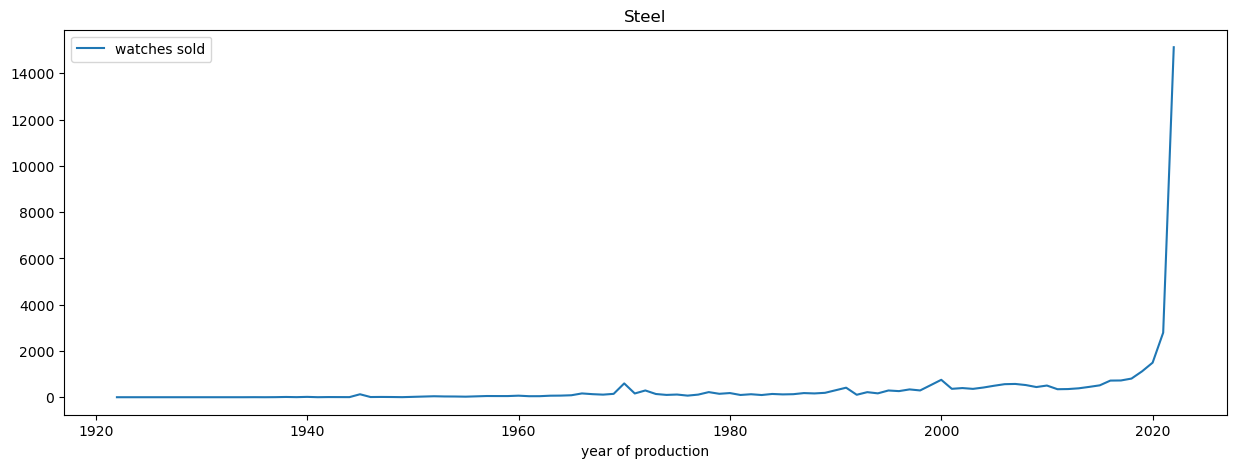

In [227]:
# Steel
res_cm_plot1.plot(x = 'year of production', y = 'count', label='watches sold', title='Steel', figsize=(15, 5))
plt.legend()
plt.show()

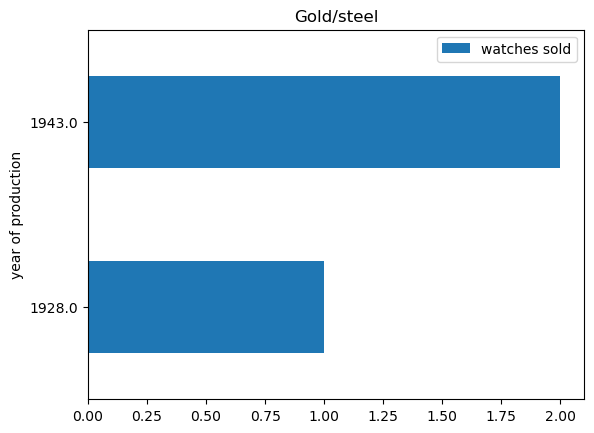

In [218]:
# Gold/steel
res_cm_plot2.plot(x = 'year of production', y = 'count', kind='barh', label='watches sold', title='Gold/steel')
plt.show()

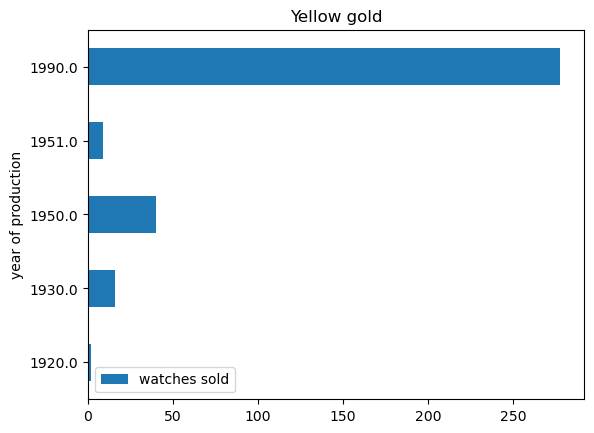

In [219]:
# Yellow gold
res_cm_plot3.plot(x = 'year of production', y = 'count', kind='barh', label='watches sold', title='Yellow gold')
plt.show()

#### Visualize the data

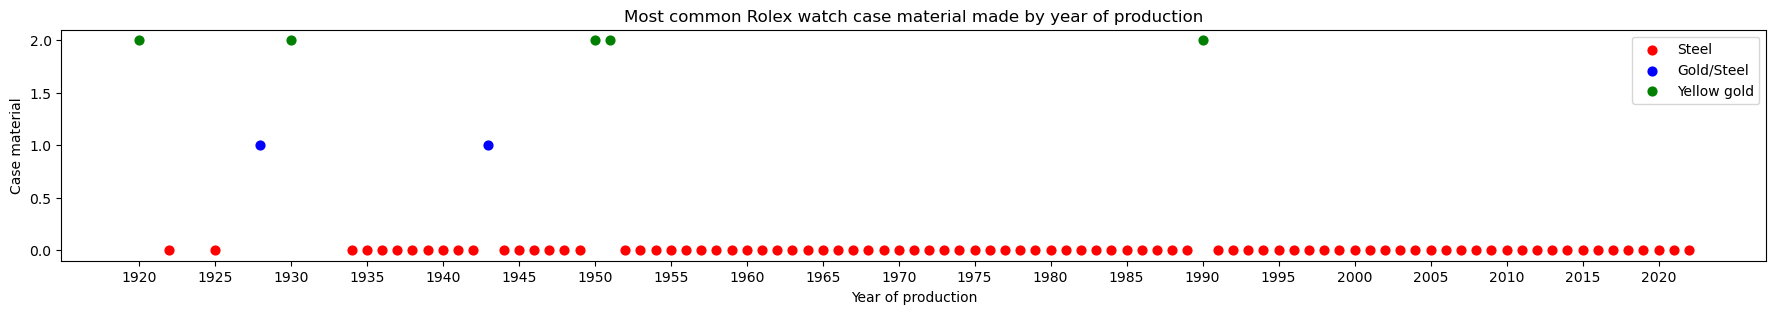

In [129]:
ax = plt.subplots(figsize=(22, 3))
scp1 = plt.scatter(res_cm_plot1['year of production'], res_cm_plot1['case material'], s=40, c='red', label='Steel')
scp2 = plt.scatter(res_cm_plot2['year of production'], res_cm_plot2['case material'], s=40, c='blue', label='Gold/Steel')
scp3 = plt.scatter(res_cm_plot3['year of production'], res_cm_plot3['case material'], s=40, c='green', label='Yellow gold')

plt.legend(handles=[scp1, scp2, scp3])
plt.title('Most common Rolex watch case material made by year of production')
plt.xlabel('Year of production')
plt.ylabel('Case material')

plt.xticks(np.arange(1920, 2022, 5))
plt.show()

#### Conclusion b
- Steel is the most common case material in Rolex watches from 1920 to now
- There were some changes in the case material of Rolex watches in the past but it is not significant enough to be noticed

### Conclusion
- The most common case material of Rolex watches is Steel from 1920 to now
- Rolex changed their strategy to satisfy the needs of their customers
  - In this case, they have to change their movement from Manual to Automatic to satisfy the needs of their customers
- So if there's nothing changes in the future like Rolex come up a very inovative watches movement or case material, We can assume that in the next years, the majority of Rolex watches sold on the market will be made of Steel and have Automatic movement.

- By answering this question
  - We can know that Rolex is similar to any other business, they have to change their strategy to satisfy the needs of their customers. Before this we thought that Rolex is very much of a traditional company and they would never change their strategy
  - We can know that in the future, the majority of Rolex watches sold on the market will be made of Steel and have Automatic movement.

# Reflection


| Member  | Difficulties  |
|---|---|
|Lê Hồ Bảo Nhật   |I find that it kinda hard to preprocess the data before i can do my first question. Our data contains lots of noise in model name, ref number,etc..., these data stays in many form from number to object type and also lots of weird charactera and format. It was quite time-consuming to brainstorm how to deal with it. Other difficulties is which model should i choose, like you hvae already known there are many kinds of model, i have chosen base on time to learn and its performance. I also tried to stack multiple model, it actually worked but the disadvantage is that it cost me about 3-4 hours to increase 1-2% of accuracy. Next problem is that our data miss various important characteristics of rolex watch, which make our model become not too good. Finally, i think that my knowledge before doing this project is like a small fish in a big pond       |   
|Ninh Trần Hoàng Quân   |   |

| Member  | Knowledge  |
|---|---|
|Lê Hồ Bảo Nhật   |I have gained various things from this project. In preprocessing, I have learned how to choose a standard form for data. How to choose model and its parameters. And i have a chance to rewind and understand more about SVM, Gradient descent, and some other model. Also i have a chance to learn how to perform project in a nice way. I have a chance to use github and learned some funny stuff of github  |   
|Ninh Trần Hoàng Quân   |   |

If we have more time 

| Member  | WalaWalabangbang  |
|---|---|
|Lê Hồ Bảo Nhật   |I would like to scrape data myself, which can allow me to have more questions to ask. And i can have a chance to learn how to scrape data. I would choose other way like using some model to predict missing values to preprocessing data instead using median for categorical columns and mean for numerical fields.  |   
|Ninh Trần Hoàng Quân   |   |

# Contribution rate
| Member  | %  |
|---|---|
|Lê Hồ Bảo Nhật   |100%|   
|Ninh Trần Hoàng Quân   |100%|

# Reference
- https://youtu.be/iOVbAmknKUk
- https://www.youtube.com/watch?v=UQAKwWUYnuI
- https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
- https://towardsdatascience.com/4-techniques-to-deal-with-missing-data-in-datasets-841f8a303395
- https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
- https://towardsdatascience.com/mercari-price-suggestion-97ff15840dbd
- https://builtin.com/data-science/pandas-pivot-tables
- https://micro.ai/blog/using-machine-learning-algorithms-to-predict-pricing-trends
- https://towardsdatascience.com/simple-model-stacking-explained-and-automated-1b54e4357916
- https://scikit-learn.org/